# Diffumon
**A Denoising Diffusion Probabilistic Model (DDPM) for Image Generation**

This notebook demonstrates checkpoint loading and sample generation.

In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
# Imports
import torch
from diffumon.diffusion.sampler import p_sampler_to_images
from diffumon.utils import get_device, load_unet_checkpoint
from diffumon.models.unet import Unet
import PIL
from PIL.Image import Image as PILImage
from IPython.display import display
import pickle

from diffumon.metrics.plots import combine_images

In [55]:
checkpoint_path = "../checkpoints/fashion_mnist_100_epochs.pth"
device = get_device()

Using device: cuda


In [56]:
model, noise_schedule, chw_dims = load_unet_checkpoint(
    checkpoint_path, device=device
)

Loading trained model from ../checkpoints/fashion_mnist_100_epochs.pth...
Model loaded.


/home/ladu/Code/DiffuMon/src/diffumon/utils.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  img_dim = checkpoint.get("img_dim", (1, 28, 28))  # FIXME: unhardcode later


In [57]:
# Generate samples
print("Generating samples...")
samples: list[PILImage] = p_sampler_to_images(
    model=model,
    ns=noise_schedule,
    num_samples=48,
    chw_dims=chw_dims,
    seed=2048,
    output_dir=None,
    device=device,
)

Generating samples...


## Show Generated FashionMNIST samples

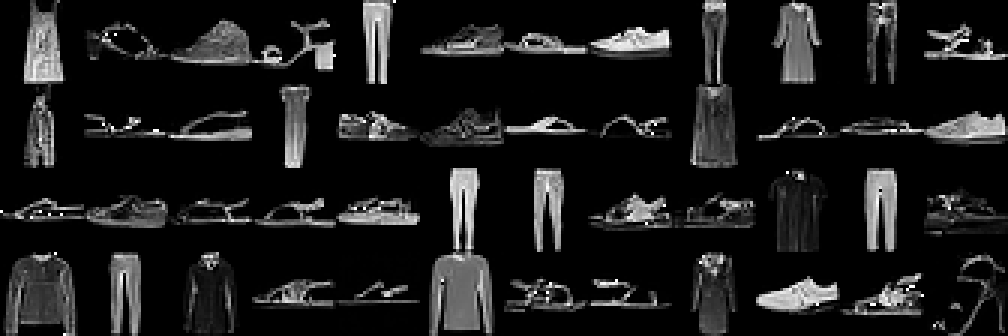

In [60]:
combined = combine_images(samples, rows=4, cols=len(samples) // 4)

scale = 3
combined = combined.resize(
    (combined.width * scale, combined.height * scale), resample=PIL.Image.BOX
)
# Plot the combined image and display
display(combined)